In [1]:
import pyforest
lazy_imports()

['import spacy',
 'import numpy as np',
 'from pyspark import SparkContext',
 'import nltk',
 'import sklearn',
 'import plotly.express as px',
 'import glob',
 'import bokeh',
 'import seaborn as sns',
 'import plotly as py',
 'import datetime as dt',
 'from openpyxl import load_workbook',
 'from sklearn import svm',
 'import dash',
 'import pandas as pd',
 'import os',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import altair as alt',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from pathlib import Path',
 'from sklearn.preprocessing import OneHotEncoder',
 'import tqdm',
 'from sklearn.model_selection import train_test_split',
 'import keras',
 'import statistics',
 'import tensorflow as tf',
 'from sklearn.ensemble import RandomForestRegressor',
 'import re',
 'import matplotlib as mpl',
 'from dask import dataframe as dd',
 'import matplotlib.pyplot as plt',
 'import gensim',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from s

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect("Downloads/Datasets/amazon-fine-food-reviews/database.sqlite")

In [4]:
con

In [5]:
database=pd.read_sql_query("select * from reviews where Score<>3 limit 10005",con)

<IPython.core.display.Javascript object>

In [6]:
def partitions(x):
    if x>3:
        return 1
    return 0

In [7]:
database

Id   ProductId          UserId                      ProfileName  \
0          1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1          2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2          3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3          4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4          5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...      ...         ...             ...                              ...   
10000  10927  B000EM6PC6  A39UIJ7NSFP3RG             Rick the Camera  Man   
10001  10928  B000EM6PC6   AFNJIJ3Z0DAA4                        Shelley P   
10002  10929  B000EM6PC6   AXFC46EC13J4Z                     squaredancer   
10003  10930  B000EM6PC6  A18TAR586WZNLC                           kitkat   
10004  10931  B000EM6PC6  A1J205ZK25TZ6W                        kez panel   

       HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                         1                       1      5  1303862400   
1                         0                       0      1  1346976000   
2                         1                       1      4  1219017600   
3                         3                       3      2  1307923200   
4                         0                       0      5  1350777600   
...                     ...                     ...    ...         ...   
10000                     0                       0      5  1348876800   
10001                     0                       0      5  1348790400   
10002                     0                       0      5  1348185600   
10003                     0                       0      5  1348099200   
10004                     0                       0      5  1335657600   

                                              Summary  \
0                               Good Quality Dog Food   
1                                   Not as Advertised   
2                               "Delight" says it all   
3                                      Cough Medicine   
4                                         Great taffy   
...                                               ...   
10000              Loose Tea is cheaper than Tea Bags   
10001  Top quality product for hard-to-find loose tea   
10002                                       loose tea   
10003                       English tradition goes on   
10004      a few dry grams makes 2 liters of hot tea!   

                                                    Text  
0      I have bought several of the Vitality canned d...  
1      Product arrived labeled as Jumbo Salted Peanut...  
2      This is a confection that has been around a fe...  
3      If you are looking for the secret ingredient i...  
4      Great taffy at a great price.  There was a wid...  
...                                                  ...  
10000  As I said, loose Tea is cheaper than Tea Bags,...  
10001  My family makes a lot of ice tea during the su...  
10002  This is the only way to make good good iced te...  
10003  Being married to a person from England, as mos...  
10004  I use a little plastic shot glass to brew 2 li...  

[10005 rows x 10 columns]

In [8]:
database.Score=database.Score.map(partitions)

In [9]:
database.Score.value_counts()

1    8326
0    1679
Name: Score, dtype: int64

In [10]:
database[database.HelpfulnessNumerator<=database.HelpfulnessDenominator]

Id   ProductId          UserId                      ProfileName  \
0          1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1          2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2          3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3          4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4          5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...      ...         ...             ...                              ...   
10000  10927  B000EM6PC6  A39UIJ7NSFP3RG             Rick the Camera  Man   
10001  10928  B000EM6PC6   AFNJIJ3Z0DAA4                        Shelley P   
10002  10929  B000EM6PC6   AXFC46EC13J4Z                     squaredancer   
10003  10930  B000EM6PC6  A18TAR586WZNLC                           kitkat   
10004  10931  B000EM6PC6  A1J205ZK25TZ6W                        kez panel   

       HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                         1                       1      1  1303862400   
1                         0                       0      0  1346976000   
2                         1                       1      1  1219017600   
3                         3                       3      0  1307923200   
4                         0                       0      1  1350777600   
...                     ...                     ...    ...         ...   
10000                     0                       0      1  1348876800   
10001                     0                       0      1  1348790400   
10002                     0                       0      1  1348185600   
10003                     0                       0      1  1348099200   
10004                     0                       0      1  1335657600   

                                              Summary  \
0                               Good Quality Dog Food   
1                                   Not as Advertised   
2                               "Delight" says it all   
3                                      Cough Medicine   
4                                         Great taffy   
...                                               ...   
10000              Loose Tea is cheaper than Tea Bags   
10001  Top quality product for hard-to-find loose tea   
10002                                       loose tea   
10003                       English tradition goes on   
10004      a few dry grams makes 2 liters of hot tea!   

                                                    Text  
0      I have bought several of the Vitality canned d...  
1      Product arrived labeled as Jumbo Salted Peanut...  
2      This is a confection that has been around a fe...  
3      If you are looking for the secret ingredient i...  
4      Great taffy at a great price.  There was a wid...  
...                                                  ...  
10000  As I said, loose Tea is cheaper than Tea Bags,...  
10001  My family makes a lot of ice tea during the su...  
10002  This is the only way to make good good iced te...  
10003  Being married to a person from England, as mos...  
10004  I use a little plastic shot glass to brew 2 li...  

[10005 rows x 10 columns]

In [11]:
sorted_database=database.sort_values("ProductId")

In [12]:
drop_duplicates_database=sorted_database.drop_duplicates(["ProductId","UserId","Time","Text"])

In [13]:
drop_duplicates_database=drop_duplicates_database.sort_values("Time")

In [18]:
drop_duplicates_database

Id   ProductId          UserId    ProfileName  HelpfulnessNumerator  \
1146  1245  B00002Z754  A29Z5PI9BW2PU3         Robbie                     7   
1145  1244  B00002Z754  A3B8RCEI0FXFI6      B G Chase                    10   
7427  8111  B0000EIE2Z  A3M174IC0VXOS2     Gail Cooke                     3   
3481  3783  B00016UX0K   AF1PV3DIC0XM7  Robert Ashton                     1   
6790  7432  B0001E1IME  A2IKCTD1I73PLW          Adeba                     2   
...    ...         ...             ...            ...                   ...   
8254  9031  B006N3IG4K  A3GFZIL1E0Z5V8       bloomen1                     0   
7620  8322  B003VXFK44  A3GFZIL1E0Z5V8       bloomen1                     0   
7451  8135  B0019GVYR2   ACSO5EDO1UMZ5   SeekingBodhi                     0   
1005  1089  B004FD13RW    A1BPLP0BKERV           Paul                     0   
5259  5703  B009WSNWC4   AMP7K1O84DH1T           ESTY                     0   

      HelpfulnessDenominator  Score        Time  \
1146                       7      1   961718400   
1145                      10      1   962236800   
7427                       3      1  1075420800   
3481                       2      1  1081555200   
6790                       8      1  1083456000   
...                      ...    ...         ...   
8254                       0      1  1351209600   
7620                       0      1  1351209600   
7451                       0      0  1351209600   
1005                       0      1  1351209600   
5259                       0      1  1351209600   

                                Summary  \
1146                      Great Product   
1145     WOW Make your own 'slickers' !   
7427                   BEST BLUEBERRIES   
3481                  Classic Condiment   
6790             amazon monopoly/ripoff   
...                                 ...   
8254  Rodeo Drive is Crazy Good Coffee!   
7620  Rodeo Drive is Crazy Good Coffee!   
7451                          NEWSFLASH   
1005                     It is awesome.   
5259                          DELICIOUS   

                                                   Text  
1146  This was a really good idea and the final prod...  
1145  I just received my shipment and could hardly w...  
7427  In the winter when fresh blueberries exceed ou...  
3481  Mae Ploy Sweet Chili Sauce is becoming a stand...  
6790  love the snack.  wanted to buy a bunch.<p>ship...  
...                                                 ...  
8254  Rodeo Drive is my absolute favorite and I'm re...  
7620  Rodeo Drive is my absolute favorite and I'm re...  
7451  I just called Bob's Red Mill customer service ...  
1005  My partner is very happy with the tea, and is ...  
5259  Purchased this product at a local store in NY ...  

[9995 rows x 10 columns]

In [14]:
def preprocess_text(sentence):
    def remove_html(sentence):
        html_tag_re_obj = re.compile('<.*>?')
        return re.sub(html_tag_re_obj, ' ', sentence)

    def remove_punctuations(sentence):
        cleaned_sentence = re.sub(r'[^a-zA-Z]', r' ', sentence)
        return cleaned_sentence

    def decontracted(phrase):
        # specific
        phrase = re.sub(r"won\'t", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        return phrase

    from bs4 import BeautifulSoup
    import re
    #from nltk.corpus import stopwords
    import nltk
    from tqdm import tqdm
    from nltk.stem import SnowballStemmer
    from nltk.corpus import stopwords
    stopwords = stopwords.words('english')
    stemmer = SnowballStemmer('english')
    stopwords = set(stopwords)
    stopwords.remove('not')

    cleaned_corpus = []
    for doc in sentence:
        cleaned_doc_1 = remove_html(doc)
        cleaned_doc_2 = remove_punctuations(doc)
        cleaned_doc_2 = decontracted(cleaned_doc_2)
        cleaned_corpus.append(cleaned_doc_2)
    count = 0

    filtered_corpus = list(map(lambda doc: ' '.join(list(filter(lambda word: True if word not in stopwords else False\
                                                                , doc.split()))),cleaned_corpus))
    process_text = list(map(lambda doc: ' '.join(list(map(stemmer.stem, doc.split()))),filtered_corpus))

    return process_text

In [15]:
%%time
process_text=preprocess_text(drop_duplicates_database.Text)

CPU times: user 8.17 s, sys: 235 ms, total: 8.4 s
Wall time: 14 s


In [16]:
process_text[1]

'i receiv shipment could hard wait tri product we love quot slicker quot call instead sticker remov easili my daughter design sign print revers use car window they print beauti the print shop program i go lot fun product window everywher surfac like tv screen comput monitor'

In [19]:
X=process_text
Y=drop_duplicates_database.Score

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

<IPython.core.display.Javascript object>

6996
2999
6996
2999


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
count_vectorizer=CountVectorizer(min_df=10)

In [27]:
count_vectorizer.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=10,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [29]:
bow_features=count_vectorizer.get_feature_names()
print(bow_features)

['abil', 'abl', 'about', 'absolut', 'absorb', 'accept', 'accid', 'accord', 'account', 'acerola', 'ach', 'acid', 'acquir', 'across', 'activ', 'actual', 'ad', 'add', 'addict', 'addit', 'address', 'adjust', 'admit', 'adopt', 'ador', 'adult', 'advanc', 'advantag', 'advertis', 'advic', 'affect', 'afford', 'afraid', 'after', 'afternoon', 'aftertast', 'afterward', 'again', 'agav', 'age', 'ago', 'agre', 'ahead', 'aid', 'air', 'airtight', 'aisl', 'alcohol', 'all', 'allerg', 'allergen', 'allergi', 'allow', 'almond', 'almost', 'alon', 'along', 'alot', 'alreadi', 'also', 'alter', 'altern', 'although', 'aluminum', 'alway', 'am', 'amaz', 'amazon', 'amber', 'america', 'american', 'among', 'amount', 'an', 'and', 'ani', 'anim', 'anni', 'annoy', 'anoth', 'answer', 'anti', 'anticip', 'antioxid', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'anywher', 'apart', 'appar', 'appeal', 'appear', 'appl', 'appli', 'appreci', 'approach', 'approxim', 'are', 'area', 'argentina', 'arm', 'aroma', 'aromat', 'around',

In [30]:
bow_x_train=count_vectorizer.transform(x_train)
bow_x_test=count_vectorizer.transform(x_test)
print(bow_x_train.shape)
print(bow_x_test.shape)

(6996, 2348)
(2999, 2348)


In [32]:
print(bow_x_train)
print(bow_x_test)

  (0, 133)	1
  (0, 386)	1
  (0, 609)	1
  (0, 896)	1
  (0, 914)	1
  (0, 1432)	1
  (0, 1629)	1
  (0, 1778)	1
  (0, 1846)	1
  (0, 1947)	1
  (0, 2033)	1
  (0, 2091)	1
  (1, 386)	2
  (1, 490)	1
  (1, 869)	1
  (1, 896)	1
  (1, 1010)	1
  (1, 1583)	1
  (1, 1719)	1
  (1, 1789)	1
  (1, 2033)	1
  (1, 2099)	1
  (2, 66)	1
  (2, 371)	1
  (2, 629)	1
  :	:
  (6994, 1353)	2
  (6994, 1355)	1
  (6994, 1469)	2
  (6994, 1515)	1
  (6994, 1557)	3
  (6994, 1589)	1
  (6994, 1631)	1
  (6994, 1745)	1
  (6994, 2002)	1
  (6994, 2067)	1
  (6994, 2099)	1
  (6994, 2113)	1
  (6994, 2126)	1
  (6994, 2196)	1
  (6994, 2333)	1
  (6995, 134)	1
  (6995, 869)	1
  (6995, 950)	1
  (6995, 1195)	1
  (6995, 1394)	1
  (6995, 1432)	1
  (6995, 1466)	1
  (6995, 1621)	2
  (6995, 1724)	1
  (6995, 2033)	1
  (0, 121)	1
  (0, 200)	1
  (0, 386)	1
  (0, 643)	1
  (0, 877)	1
  (0, 996)	1
  (0, 1068)	2
  (0, 1162)	1
  (0, 1195)	2
  (0, 1353)	2
  (0, 1394)	1
  (0, 1469)	1
  (0, 1596)	1
  (0, 2283)	1
  (1, 79)	1
  (1, 198)	1
  (1, 225)	1
  (1, 2

In [33]:
bow_x_train=bow_x_train.toarray()
bow_x_test=bow_x_test.toarray()
print(bow_x_train)
print(bow_x_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
from sklearn.model_selection import GridSearchCV

In [38]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [50]:
d_tree=DecisionTreeClassifier(class_weight="balanced")
parameter={"max_depth":list(np.arange(20,100,10)),"min_samples_leaf":list(np.arange(7,30,2))}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
%%time
clf=GridSearchCV(d_tree,param_grid=parameter,scoring="roc_auc",cv=4,return_train_score=True)
clf.fit(bow_x_train,y_train)

CPU times: user 12min 20s, sys: 13.5 s, total: 12min 34s
Wall time: 12min 35s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [52]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 40, 'min_samples_leaf': 13}
0.7941074690808891


In [53]:
from sklearn import metrics

In [55]:
y_tr_pred=clf.predict_proba(bow_x_train)
fpr_tr,tpr_tr,threshold_tr=roc_curve(y_train,y_tr_pred[:,1])
roc_auc_tr=metrics.auc(fpr_tr,tpr_tr)
y_test_pred=clf.predict_proba(bow_x_test)
fpr,tpr,threshold=roc_curve(y_test,y_test_pred[:,1])
roc_auc_test=metrics.auc(fpr,tpr)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

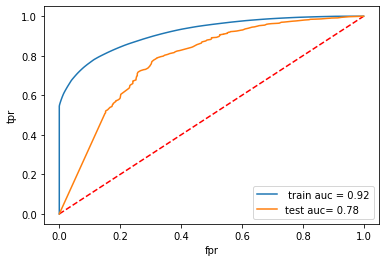

In [57]:
plt.plot([0,1],[0,1],"r--")
plt.plot(fpr_tr,tpr_tr,label=" train auc = %0.2f"%roc_auc_tr)
plt.plot(fpr,tpr,label="test auc= %0.2f"%roc_auc_test)
plt.legend(loc="lower right")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

confusion matrix:
 [[ 341  139]
 [ 664 1855]]
the classification reports:
               precision    recall  f1-score   support

           0       0.34      0.71      0.46       480
           1       0.93      0.74      0.82      2519

    accuracy                           0.73      2999
   macro avg       0.63      0.72      0.64      2999
weighted avg       0.84      0.73      0.76      2999



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

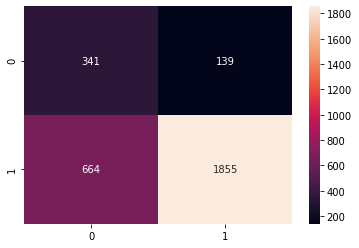

In [63]:
y_pred=clf.predict(bow_x_test)
confusion_mat=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",confusion_mat)
class_report=classification_report(y_test,y_pred)
print("the classification reports:\n",class_report)
sns.heatmap(confusion_mat,annot=True,fmt="g")
plt.show()

In [62]:
feature_importance=clf.best_estimator_.feature_importances_
print(feature_importance)

[0. 0. 0. ... 0. 0. 0.]


In [64]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
import pydotplus

/home/sushil/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [65]:
from sklearn import tree
dotfile =StringIO()
tree.export_graphviz(clf.best_estimator_,feature_names=bow_features,filled=True,rounded=True,out_file=dotfile)
graph=pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png("dtree.png")

True

In [66]:
(graph,)=pydot.graph_from_dot_data(dotfile.getvalue())

In [67]:
Image(graph.create_png())